In [1]:
import sys
import os

# Add particle_detection to sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
from particle_detection.autoencoder.model import create_autoencoder
from particle_detection.autoencoder.utils import load_model
from particle_detection.data.dataset import ImageDataset, get_transforms

In [3]:
# Path to the trained model
model_path = "../saved_models/ae_1000_epochs.pth"

# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create and load the model
model = create_autoencoder().to(device)
model = load_model(model, model_path, device=device)
model.eval()  # Set the model to evaluation mode

print("Model loaded successfully.")

[DEBUG] Loading model from: ../saved_models/ae_1000_epochs.pth
[DEBUG] Model loaded successfully from ../saved_models/ae_1000_epochs.pth.
Model loaded successfully.


In [4]:
from particle_detection.data.dataset import ImageDataset, get_transforms

# Define dataset and transformations
dataset_dir = "/home/blah-buttery/nanoparticles/images/normal"  # Update to your dataset path
transform = get_transforms(image_size=(1024, 1024), is_train=False)

# Create the dataset and dataloader
dataset = ImageDataset(data_dir=dataset_dir, transform=transform, split="test", test_size=0.2)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=False)

print(f"[DEBUG] Loaded dataset with {len(dataset)} samples for evaluation.")


[DEBUG] Loaded dataset with 3 samples for evaluation.


In [5]:
import torch.nn as nn

# Define loss function
criterion = nn.MSELoss()
# Evaluate the model
model.eval()  # Set the model to evaluation mode
total_loss = 0.0

with torch.no_grad():  # Disable gradient computation for evaluation
    for batch_idx, images in enumerate(dataloader):
        images = images.to(device)  # Move images to the same device as the model
        outputs = model(images)  # Forward pass through the model
        loss = criterion(outputs, images)  # Calculate reconstruction loss
        total_loss += loss.item()  # Accumulate the total loss

        print(f"[DEBUG] Batch {batch_idx + 1}/{len(dataloader)}, Loss: {loss.item():.4f}")

# Calculate average loss
average_loss = total_loss / len(dataloader)
print(f"Average Reconstruction Loss: {average_loss:.4f}")

[DEBUG] Batch 1/1, Loss: 0.0009
Average Reconstruction Loss: 0.0009


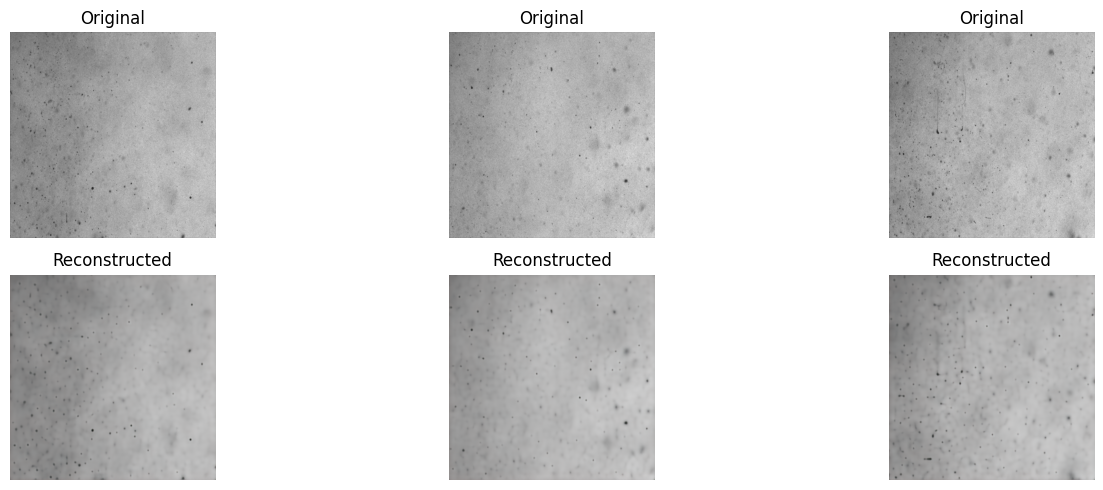

In [6]:
import matplotlib.pyplot as plt

# Get a batch of test images
images = next(iter(dataloader))  # Assuming your dataset returns images only
images = images.to(device)
outputs = model(images)

# Move to CPU for visualization
images = images.cpu().numpy()
outputs = outputs.cpu().detach().numpy()

# Plot original vs reconstructed images
fig, axes = plt.subplots(2, len(images), figsize=(15, 5))
for i in range(len(images)):
    # Original
    axes[0, i].imshow(images[i].transpose(1, 2, 0))  # Assuming images are CHW format
    axes[0, i].set_title("Original")
    axes[0, i].axis("off")
    # Reconstructed
    axes[1, i].imshow(outputs[i].transpose(1, 2, 0))
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()
